In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
train = pd.read_csv('Data/train.csv')
test  = pd.read_csv('Data/test.csv')

In [3]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
print("Shape of train dataset: ",train.shape)
print("Shape of test dataset: ",test.shape)

Shape of train dataset:  (300000, 32)
Shape of test dataset:  (200000, 31)


In [5]:
num_cols = [feature for feature in train.columns.difference(['target','id']) if train[feature].dtypes in ['int32','int64','float32','float64']]

print(num_cols)


['cont0', 'cont1', 'cont10', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9']


In [6]:
cat_cols = [feature for feature in train.columns if train[feature].dtypes in ['object']]

print(cat_cols)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']


In [7]:
### def to count nunique for continuous if > #of feature

### def to count nunique for categorical if >#of feature

### def to numeric value counts

### def to categorical value counts

### target value counts() and plots()


##### Target variable Counts and distribution 

In [8]:
train['target'].nunique()

2

In [9]:
train['target'].value_counts()

0    220539
1     79461
Name: target, dtype: int64

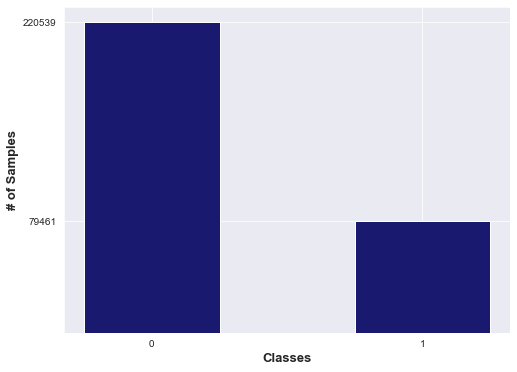

In [10]:
plt.figure(figsize=(8,6))

plt.bar(x=train['target'].value_counts().index,
        height=train['target'].value_counts().values,
       width=0.5,color='midnightblue')

plt.xlabel('Classes',fontsize=13,fontweight='bold')
plt.ylabel('# of Samples',fontsize=13,fontweight='bold')
plt.xticks(ticks=[0,1])
plt.yticks(ticks=train['target'].value_counts().values)

plt.show()

##### Numerical Feature Distribution

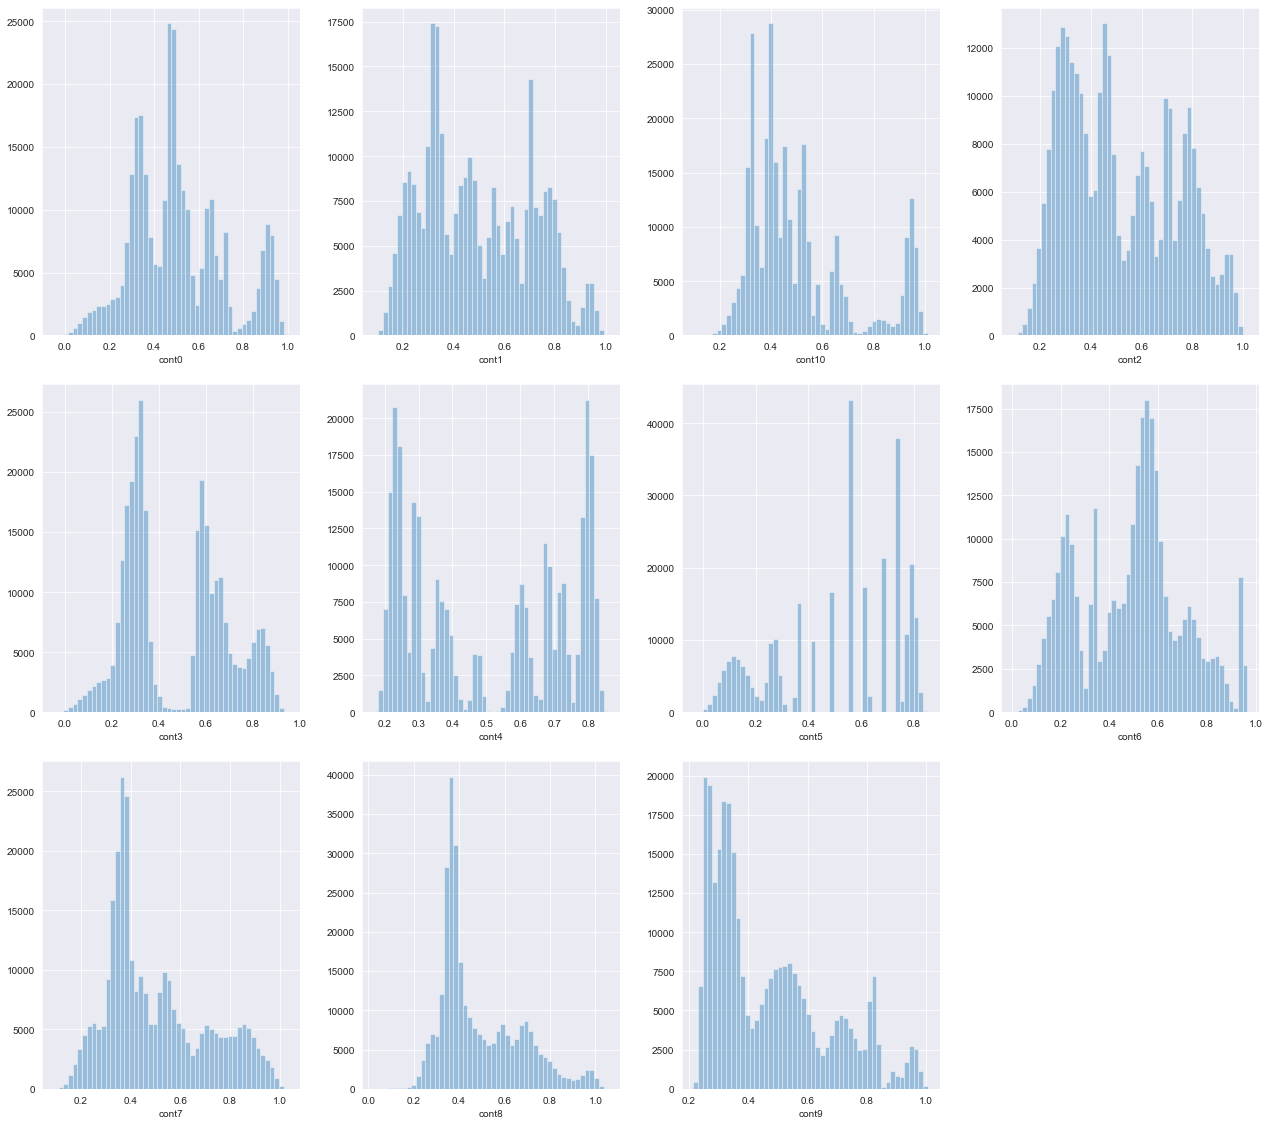

In [11]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_cols):
    plt.subplot(3,4,index+1)
    sns.distplot(train.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=2.0)

##### Categorical Feature Distribution

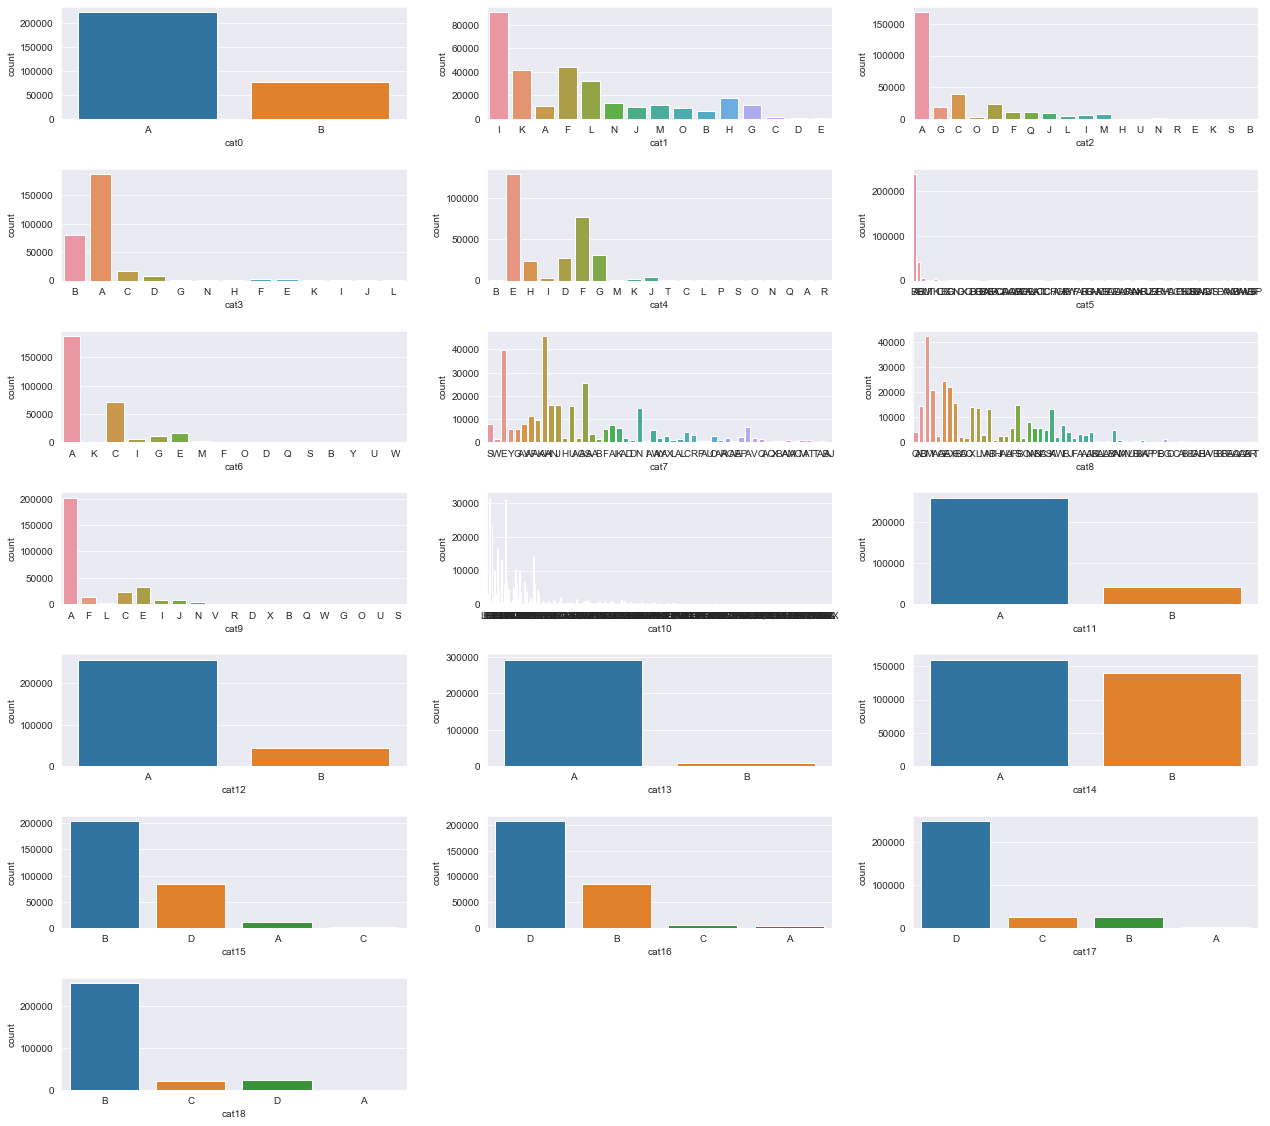

In [12]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cat_cols):
    plt.subplot(7,3,index+1)
    sns.countplot(x=col,data=train)
fig.tight_layout(pad=2.0)

In [13]:
num_nunique = [train[col].nunique() for col in num_cols]

cat_nunique = [train[col].nunique() for col in cat_cols]

df_num_nunique = pd.DataFrame({'Feature':num_cols, 'Nunique':num_nunique})
df_cat_nunique = pd.DataFrame({'Feature':cat_cols, 'Nunique':cat_nunique})

#df_nunique = pd.concat([df_num_nunique,df_cat_nunique],axis=0,ignore_index=True)

In [14]:
df_num_nunique.head(5)

,Feature,Nunique
0,cont0,299874
1,cont1,299861
2,cont10,299823
3,cont2,299872
4,cont3,299818


From numerical feature distribtion, we can see that some of the features has multimodal distirbution, where multiple maxima are present for these features

In [15]:
df_cat_nunique['Most Freq Value%'] = [(train[c].value_counts().iloc[0]/len(train))*100 for c in cat_cols]

In [16]:
df_cat_nunique = df_cat_nunique.sort_values(by=['Nunique','Most Freq Value%'],ascending=[False,True])
df_cat_nunique

,Feature,Nunique,Most Freq Value%
10,cat10,299,10.528000
5,cat5,84,79.521000
8,cat8,61,14.126667
7,cat7,51,15.272667
4,cat4,20,43.128333
2,cat2,19,56.231333
9,cat9,19,67.315000
6,cat6,16,62.632000
1,cat1,15,30.269667
3,cat3,13,62.417000


categorical variable - cat5, cat7, cat8 and cat10 has very high cardinality. We will do variable selection later then will encode these accordingly. 

In [17]:
cat_cols_lowdim = df_cat_nunique['Feature'].values.tolist()[4:]
print(cat_cols_lowdim)

['cat4', 'cat2', 'cat9', 'cat6', 'cat1', 'cat3', 'cat15', 'cat16', 'cat17', 'cat18', 'cat14', 'cat0', 'cat12', 'cat11', 'cat13']


##### Missing value Treatment

In [18]:
train.isnull().sum().sum()

0

In [19]:
test.isnull().sum().sum()

0

No missing values present in train and test dataset.

##### Outlier Treatment

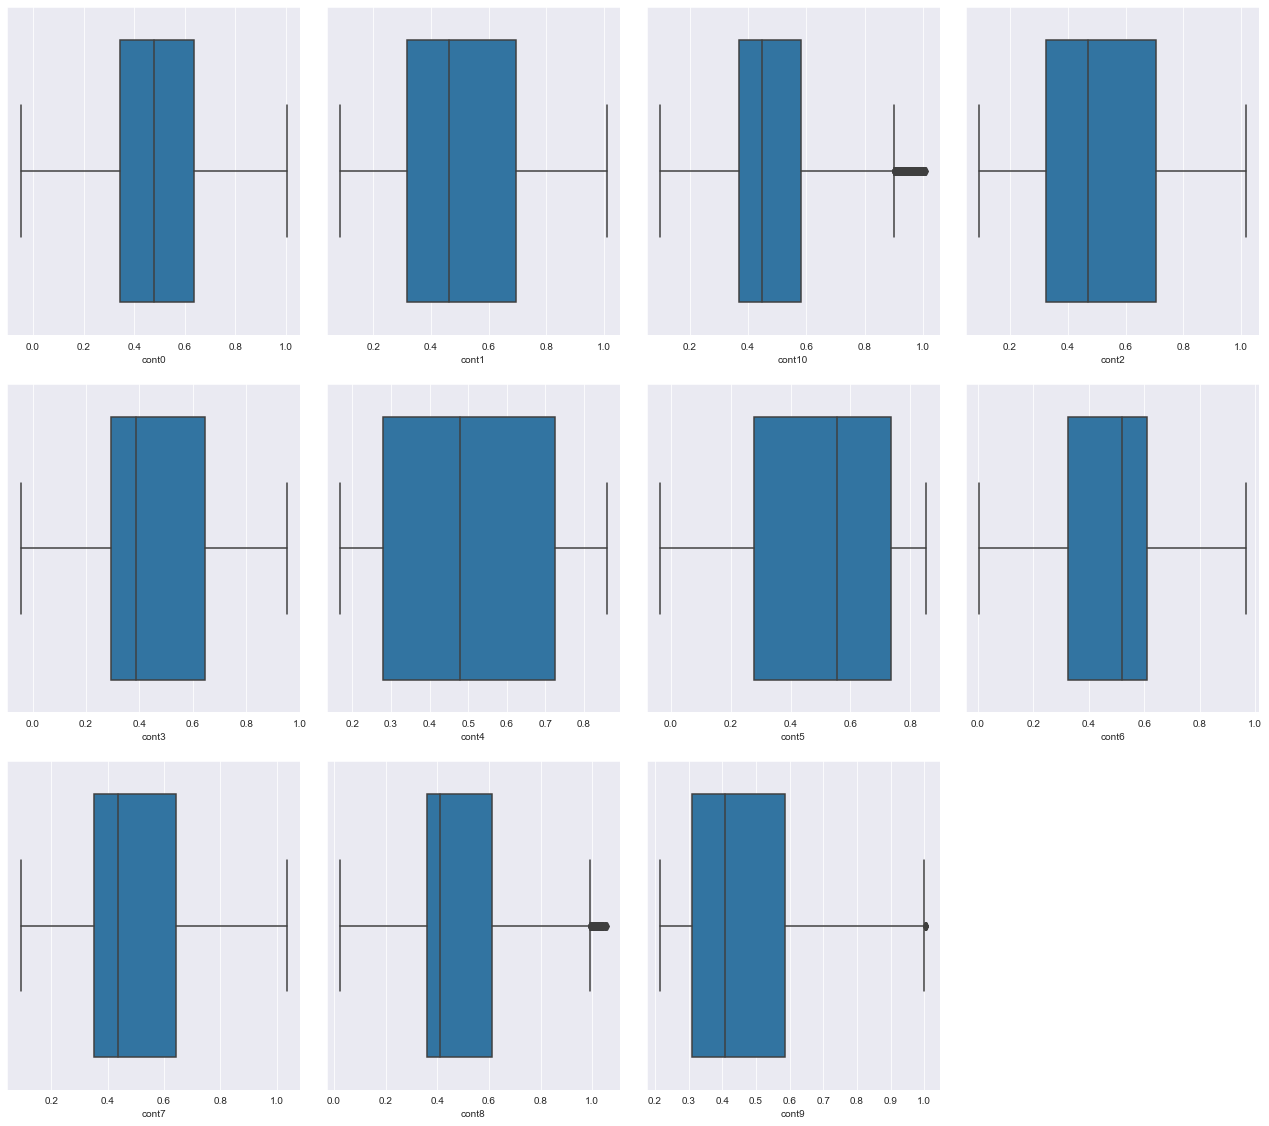

In [20]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_cols):
    plt.subplot(3,4,index+1)
    sns.boxplot(x=col,data=train)
fig.tight_layout(pad=2.0)

From above boxplot we can see that there is no such extreme values present in numerical feature in train dataset. So outlier capping or treatment is not required.

##### Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [22]:
xtrain = train.iloc[:,:31]
x_full = pd.concat([xtrain,test])

print("Shape of combined dataset",x_full.shape)
x_full.head(4)

Shape of combined dataset (500000, 31)


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0,A,I,A,B,B,BI,A,S,Q,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,1,A,I,A,A,E,BI,K,W,AD,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,2,A,K,A,A,E,BI,A,E,BM,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242


In [23]:
for col in cat_cols:
    encoder = OrdinalEncoder(dtype='int64')
    encoder.fit(x_full[[col]])
    x_full[col] = encoder.transform(x_full[[col]])

In [24]:
x_full.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0,0,8,0,1,1,33,0,44,54,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,1,0,8,0,0,4,33,8,48,3,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,2,0,10,0,0,4,33,0,30,38,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,3,0,10,0,2,4,33,0,50,3,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,4,0,8,6,1,4,33,2,32,54,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


##### Train-Test-Validation split

In [25]:
print("Shape of train dataset: ",train.shape)
print("Shape of test dataset: ",test.shape)

Shape of train dataset:  (300000, 32)
Shape of test dataset:  (200000, 31)


In [26]:
xtrain = x_full.iloc[:300000].drop(['id'],axis=1)
ytrain = train['target']

print("Shape : ",xtrain.shape)
print("Shape : ",ytrain.shape)

Shape :  (300000, 30)
Shape :  (300000,)


In [27]:
xtest_id = test['id']
xtest = x_full.iloc[300000:].drop(['id'],axis=1)

print("Shape : ",xtest.shape)

Shape :  (200000, 30)


In [28]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score

from sklearn.linear_model import LogisticRegression

In [29]:
from utils import model_scoring,model_building,make_prediction

In [30]:
x_train,x_val,y_train,y_val = train_test_split(xtrain,ytrain,test_size=0.25,random_state=101)

print("Shape of x_train dataset: ",x_train.shape)
print("Shape of y_train dataset: ",y_train.shape)
print("Shape of x_val dataset: ",x_val.shape)
print("Shape of y_val dataset: ",y_val.shape)

Shape of x_train dataset:  (225000, 30)
Shape of y_train dataset:  (225000,)
Shape of x_val dataset:  (75000, 30)
Shape of y_val dataset:  (75000,)


In [31]:
Model_perf = pd.DataFrame(columns=['Model','Train score','Validation score','roc_auc_Score'])

Model_perf

,Model,Train score,Validation score,roc_auc_Score


##### Baseline model 1- Logistic Regression (Using All features)

In [32]:
clf = LogisticRegression(solver='liblinear',max_iter=1000,random_state=101)
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
roc_auc_score(y_train,clf.predict(x_train))

0.7574772209312115

In [34]:
roc_auc_score(y_val,clf.predict(x_val))

0.7565790493620504

Here .predict_proba() gives better result than .predict()

In [35]:
print(clf.predict_proba(x_train)[:,0]) ## negative class prediction

print(clf.predict_proba(x_train)[:,1] )## positive class prediction

[0.93050677 0.98284476 0.43023833 ... 0.14920591 0.9765406  0.92356174]
[0.06949323 0.01715524 0.56976167 ... 0.85079409 0.0234594  0.07643826]


In [36]:
Model_perf = model_scoring(clf,'Baseline model -logistic',x_train,y_train,x_val,y_val,Model_perf)

In [37]:
Model_perf

,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.8376,0.868596


##### Test Prediction

In [38]:
import os

In [39]:
test_pred = np.round(clf.predict_proba(xtest)[:,1],2)

In [40]:
submission = pd.DataFrame({'id':xtest_id, 'target':test_pred})

In [41]:
submission.head()

,id,target
0,5,0.06
1,6,0.62
2,8,0.14
3,9,0.09
4,11,0.09


In [42]:
submission.shape

(200000, 2)

In [43]:
submission.to_csv('Submission/submission1.csv',index=False)

##### Baseline model 2 - Logistic Regression (Using All features + complete train data)

In [44]:
clf = LogisticRegression(solver='liblinear',max_iter=1000,random_state=101)
clf.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
make_prediction(clf,xtest,xtest_id,'logistic')

This has given same score as previous model. so we will try out different algorithm using 1st approach

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BaseNB,BernoulliNB,CategoricalNB,GaussianNB,MultinomialNB

##### Baseline model 3- Decision Tree (Using All features)

In [47]:
clf = DecisionTreeClassifier(random_state=100)

clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [48]:
Model_perf = model_scoring(clf,'Baseline model -Decision Tree',x_train,y_train,x_val,y_val,Model_perf)

In [49]:
Model_perf

,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.83760,0.868596
0,Baseline model -Decision Tree,0.770124,0.76548,0.709744


In [50]:
make_prediction(clf,xtest,xtest_id,'Decision-Tree')

##### Baseline model 4- Decision Tree (Using All features + Hyperparameter tuning)

In [51]:
%%time
clf = DecisionTreeClassifier(random_state=100)

param_grid = {'max_features':["auto", "sqrt", "log2"],
             'max_depth':[3,5,7],
             'ccp_alpha':[0.01,0.05,0.1,0.5]}

#dt_clf = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)
#dt_best = dt_clf.fit(x_train,y_train)
#dt = DecisionTreeClassifier(**dt_best.best_params_,random_state=100)
#dt.fit(x_train,y_train)
#Model_perf = model_scoring(dt,'Decision Tree-Hypertuned',x_train,y_train,x_val,y_val,Model_perf)

Model_perf,model = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Decision Tree-Hypertuned',Model_perf)

Model_perf

Wall time: 2min 44s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445


In [52]:
make_prediction(model,xtest,xtest_id,'Decision-Tree-Hparam')

In [53]:
#### This is taking too much time in training, cause SVM works better with small datasets
##%%time
##clf = SVC(random_state=100)

##param_grid= {'kernel':['poly', 'rbf', 'sigmoid']}

##Model_perf,model = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'SVC-Hypertuned',Model_perf)

##Model_perf

##make_prediction(model,xtest,xtest_id,'SVC')

##### Model - Bagging ( All Features )

In [54]:
%%time

base_estimator=LogisticRegression(solver='liblinear',max_iter=1000,random_state=101)

model_bag = BaggingClassifier(base_estimator=base_estimator,
                        oob_score=True,random_state=100,n_jobs=4,n_estimators=100)

model_bag.fit(x_train,y_train)

Wall time: 5min 53s


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=101,
                                                    solver='liblinear',
                                                    tol=0.0001, verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=4,

In [55]:
%%time

Model_perf = model_scoring(model_bag,'Bagging',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_bag,xtest,xtest_id,'Bagging')

Model_perf

Wall time: 26min 19s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592


##### Model - AdaBoost (All Features + Hyperparamerter tuning)

In [56]:
%%time

base_estimator=LogisticRegression(solver='liblinear',max_iter=1000,random_state=101)

model_ada = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=100,random_state=100,learning_rate=0.1)
model_ada.fit(x_train,y_train)

Wall time: 2min 34s


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=1000,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=101,
                                                     solver='liblinear',
                                                     tol=0.0001, verbose=0,
                                                     warm_start=False),
                   learning_rate=0.1, n_estimators=100, random_state=100)

In [57]:
%%time

Model_perf = model_scoring(model_ada,'AdaBoost',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_ada,xtest,xtest_id,'AdaBoost')

Model_perf

Wall time: 1h 14min 24s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773


##### Model - Random Forest (All Features)

In [58]:
%%time

model_rf = RandomForestClassifier(random_state=100,criterion='gini',n_estimators=100)
model_rf.fit(x_train,y_train)

Wall time: 3min 20s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [59]:
%%time

Model_perf = model_scoring(model_rf,'Random Forest',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_rf,xtest,xtest_id,'RF')

Model_perf

Wall time: 33min 28s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456


In [60]:
model_rf.feature_importances_

array([0.01763956, 0.02363496, 0.02785968, 0.00973523, 0.0183555 ,
       0.00568252, 0.0118458 , 0.02437441, 0.02151665, 0.01023812,
       0.02315446, 0.01985239, 0.00325878, 0.00326009, 0.02438985,
       0.08251161, 0.10627078, 0.02084564, 0.0528118 , 0.03991751,
       0.04600327, 0.04659275, 0.04341816, 0.04290169, 0.05961825,
       0.0500256 , 0.0396131 , 0.04402888, 0.04014217, 0.04050081])

In [61]:
indices = np.argsort(model_rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns=['rank','feature','importance'])

for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           x_train.columns[indices[f]],
                          model_rf.feature_importances_[indices[f]]]
    

In [62]:
feature_rank.head()

,rank,feature,importance
0,1,cat16,0.106271
1,2,cat15,0.082512
2,3,cont5,0.059618
3,4,cat18,0.052812
4,5,cont6,0.050026


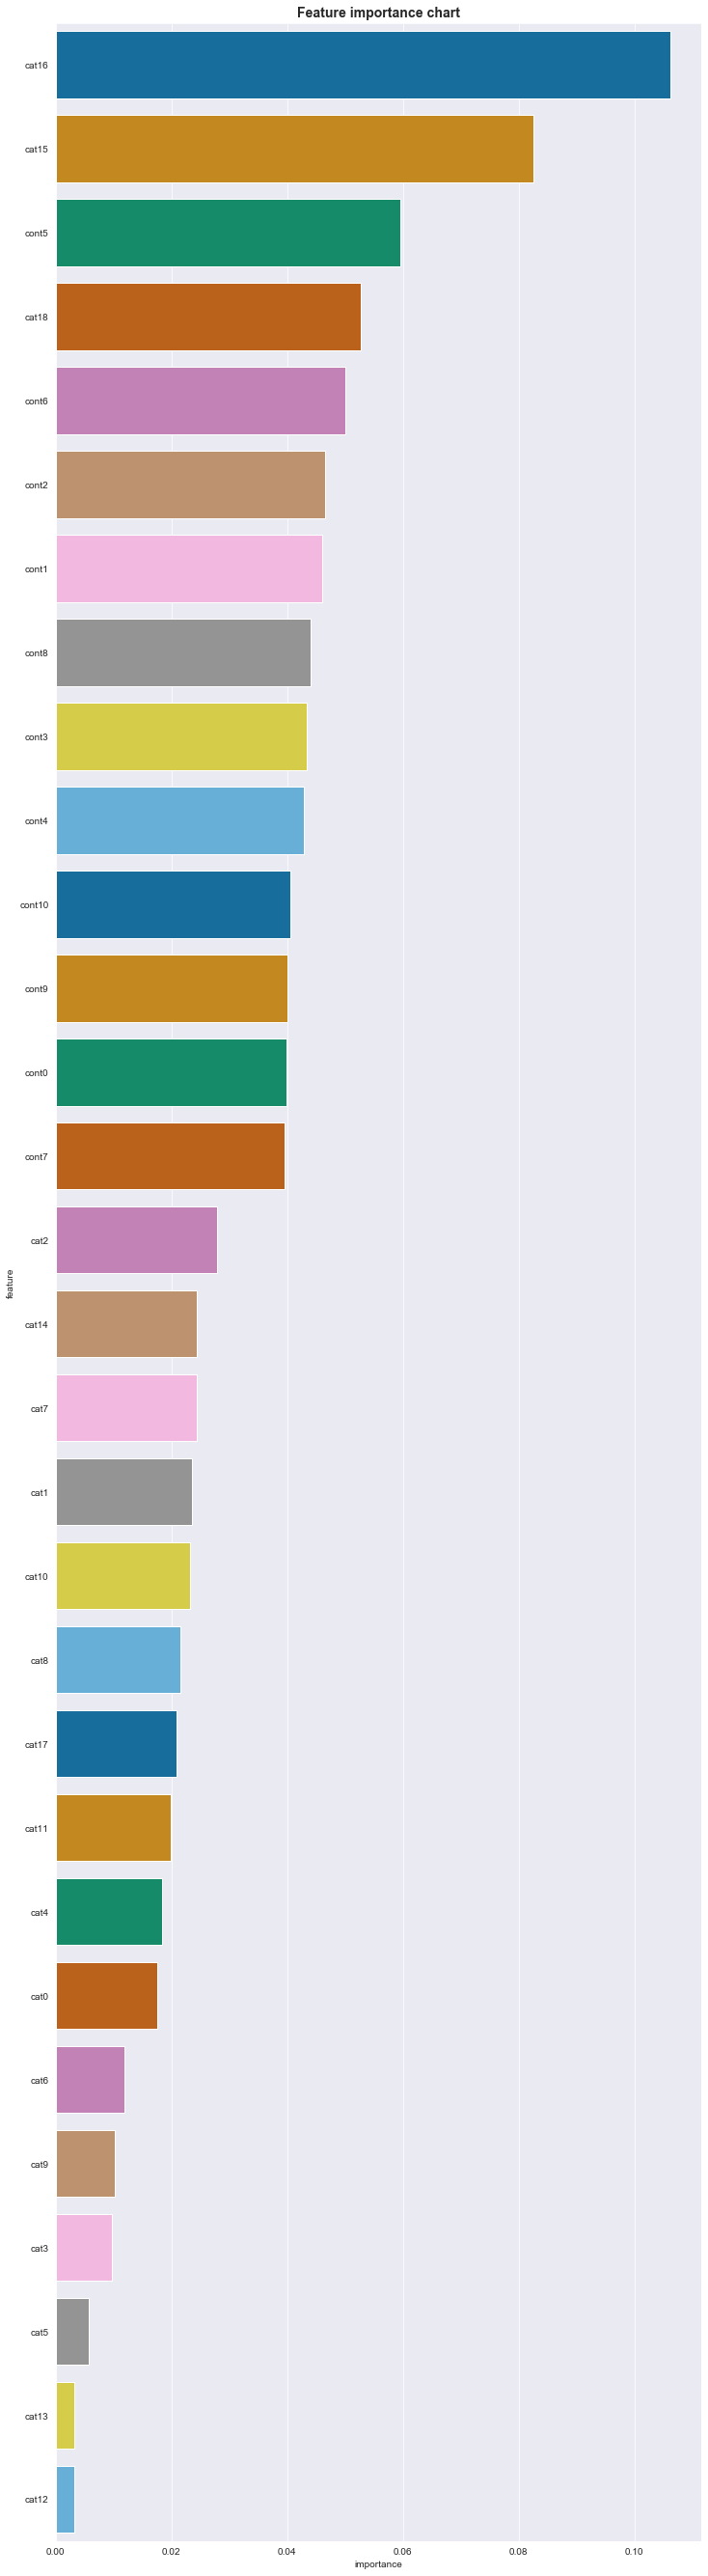

In [63]:
plt.figure(figsize=(12,48))
plt.title("Feature importance chart",fontsize=14,fontweight='bold')
sns.barplot( y = 'feature', x = 'importance', data = feature_rank,palette='colorblind');

##### Model - Gradient Boosting (All Features)

In [64]:
%%time

model_gb = GradientBoostingClassifier(random_state=100,n_estimators=100)
model_gb.fit(x_train,y_train)

Wall time: 5min 53s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
%%time

Model_perf = model_scoring(model_gb,'Gradient Boosting',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_gb,xtest,xtest_id,'GB')

Model_perf

Wall time: 27min 36s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835


In [66]:
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##### Model - XGBOOST Classification(All Features)

In [67]:
%%time

model_xgb = XGBClassifier(random_state=100,n_estimators=100)
model_xgb.fit(x_train,y_train)

Wall time: 1min


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
%%time

Model_perf = model_scoring(model_xgb,'XGBoost',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_xgb,xtest,xtest_id,'XGB')

Model_perf

Wall time: 5min 18s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721


##### Model - XGBoost Random Forest (All Features)

In [69]:
%%time

model_xgbrf = XGBRFClassifier(random_state=100,n_estimators=100)
model_xgbrf.fit(x_train,y_train)

Wall time: 45.1 s


XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='binary:logistic',
                random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [70]:
%%time

Model_perf = model_scoring(model_xgbrf,' XGBoost RF',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_xgbrf,xtest,xtest_id,'XGBRF')

Model_perf

Wall time: 4min


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470


##### Model - LightGBM (All Features)

In [71]:
%%time

model_lgbm = LGBMClassifier(random_state=100,n_estimators=100)
model_lgbm.fit(x_train,y_train)

Wall time: 3.89 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
%%time

Model_perf = model_scoring(model_lgbm,' LightGBM',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_lgbm,xtest,xtest_id,'LGBM')

Model_perf

Wall time: 27 s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417


##### Model - CatBoost (All Features)

In [73]:
%%time

model_cb = CatBoostClassifier(random_state=100,n_estimators=100)
model_cb.fit(x_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4576093	total: 283ms	remaining: 28s
1:	learn: 0.3992891	total: 389ms	remaining: 19s
2:	learn: 0.3850650	total: 479ms	remaining: 15.5s
3:	learn: 0.3770816	total: 577ms	remaining: 13.9s
4:	learn: 0.3740523	total: 661ms	remaining: 12.6s
5:	learn: 0.3712002	total: 739ms	remaining: 11.6s
6:	learn: 0.3687497	total: 827ms	remaining: 11s
7:	learn: 0.3676570	total: 919ms	remaining: 10.6s
8:	learn: 0.3665983	total: 999ms	remaining: 10.1s
9:	learn: 0.3658084	total: 1.08s	remaining: 9.7s
10:	learn: 0.3650151	total: 1.16s	remaining: 9.42s
11:	learn: 0.3641213	total: 1.24s	remaining: 9.11s
12:	learn: 0.3636221	total: 1.32s	remaining: 8.83s
13:	learn: 0.3626551	total: 1.41s	remaining: 8.64s
14:	learn: 0.3616017	total: 1.5s	remaining: 8.47s
15:	learn: 0.3610082	total: 1.58s	remaining: 8.29s
16:	learn: 0.3603407	total: 1.66s	remaining: 8.12s
17:	learn: 0.3597664	total: 1.75s	remaining: 7.96s
18:	learn: 0.3592572	total: 1.84s	remaining: 7.87s
19:	learn: 0.3589285	tot

In [74]:
%%time

Model_perf = model_scoring(model_cb,' CatBoost',x_train,y_train,x_val,y_val,Model_perf)
#Model_perf,model_bag = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'Bagging',Model_perf)

make_prediction(model_cb,xtest,xtest_id,'CB')

Model_perf

Learning rate set to 0.5
0:	learn: 0.4614319	total: 84ms	remaining: 8.32s
1:	learn: 0.4017176	total: 175ms	remaining: 8.6s
2:	learn: 0.3844159	total: 276ms	remaining: 8.92s
3:	learn: 0.3771044	total: 371ms	remaining: 8.91s
4:	learn: 0.3738001	total: 463ms	remaining: 8.8s
5:	learn: 0.3715032	total: 555ms	remaining: 8.7s
6:	learn: 0.3694873	total: 635ms	remaining: 8.44s
7:	learn: 0.3681510	total: 728ms	remaining: 8.38s
8:	learn: 0.3668464	total: 820ms	remaining: 8.29s
9:	learn: 0.3657901	total: 894ms	remaining: 8.05s
10:	learn: 0.3649554	total: 986ms	remaining: 7.98s
11:	learn: 0.3640327	total: 1.07s	remaining: 7.85s
12:	learn: 0.3631547	total: 1.16s	remaining: 7.74s
13:	learn: 0.3623347	total: 1.24s	remaining: 7.6s
14:	learn: 0.3614286	total: 1.33s	remaining: 7.54s
15:	learn: 0.3606844	total: 1.41s	remaining: 7.41s
16:	learn: 0.3601226	total: 1.49s	remaining: 7.27s
17:	learn: 0.3597542	total: 1.57s	remaining: 7.17s
18:	learn: 0.3593909	total: 1.65s	remaining: 7.05s
19:	learn: 0.3589671	

61:	learn: 0.3419675	total: 4.77s	remaining: 2.92s
62:	learn: 0.3416789	total: 4.84s	remaining: 2.84s
63:	learn: 0.3413806	total: 4.92s	remaining: 2.77s
64:	learn: 0.3410891	total: 5s	remaining: 2.69s
65:	learn: 0.3407980	total: 5.08s	remaining: 2.62s
66:	learn: 0.3405430	total: 5.14s	remaining: 2.53s
67:	learn: 0.3403342	total: 5.22s	remaining: 2.46s
68:	learn: 0.3400555	total: 5.3s	remaining: 2.38s
69:	learn: 0.3397896	total: 5.37s	remaining: 2.3s
70:	learn: 0.3396023	total: 5.45s	remaining: 2.23s
71:	learn: 0.3392681	total: 5.54s	remaining: 2.15s
72:	learn: 0.3390237	total: 5.61s	remaining: 2.08s
73:	learn: 0.3387072	total: 5.7s	remaining: 2s
74:	learn: 0.3383943	total: 5.77s	remaining: 1.92s
75:	learn: 0.3381981	total: 5.84s	remaining: 1.84s
76:	learn: 0.3379043	total: 5.92s	remaining: 1.77s
77:	learn: 0.3376895	total: 6s	remaining: 1.69s
78:	learn: 0.3373803	total: 6.09s	remaining: 1.62s
79:	learn: 0.3369795	total: 6.18s	remaining: 1.54s
80:	learn: 0.3366397	total: 6.25s	remaining

22:	learn: 0.3567414	total: 1.76s	remaining: 5.9s
23:	learn: 0.3563634	total: 1.84s	remaining: 5.83s
24:	learn: 0.3558470	total: 1.9s	remaining: 5.71s
25:	learn: 0.3552470	total: 1.98s	remaining: 5.65s
26:	learn: 0.3547909	total: 2.06s	remaining: 5.57s
27:	learn: 0.3543869	total: 2.14s	remaining: 5.49s
28:	learn: 0.3539130	total: 2.21s	remaining: 5.4s
29:	learn: 0.3535090	total: 2.28s	remaining: 5.32s
30:	learn: 0.3530385	total: 2.35s	remaining: 5.24s
31:	learn: 0.3525685	total: 2.43s	remaining: 5.16s
32:	learn: 0.3520138	total: 2.51s	remaining: 5.09s
33:	learn: 0.3514778	total: 2.58s	remaining: 5.01s
34:	learn: 0.3511354	total: 2.66s	remaining: 4.93s
35:	learn: 0.3508191	total: 2.74s	remaining: 4.87s
36:	learn: 0.3503733	total: 2.82s	remaining: 4.8s
37:	learn: 0.3499601	total: 2.9s	remaining: 4.74s
38:	learn: 0.3495823	total: 2.99s	remaining: 4.68s
39:	learn: 0.3490274	total: 3.06s	remaining: 4.59s
40:	learn: 0.3486345	total: 3.15s	remaining: 4.53s
41:	learn: 0.3482543	total: 3.22s	re

86:	learn: 0.3343640	total: 6.27s	remaining: 937ms
87:	learn: 0.3341466	total: 6.34s	remaining: 864ms
88:	learn: 0.3339218	total: 6.41s	remaining: 793ms
89:	learn: 0.3336984	total: 6.48s	remaining: 720ms
90:	learn: 0.3335265	total: 6.55s	remaining: 647ms
91:	learn: 0.3332188	total: 6.63s	remaining: 576ms
92:	learn: 0.3329696	total: 6.7s	remaining: 504ms
93:	learn: 0.3327393	total: 6.77s	remaining: 432ms
94:	learn: 0.3324418	total: 6.84s	remaining: 360ms
95:	learn: 0.3321718	total: 6.91s	remaining: 288ms
96:	learn: 0.3319322	total: 6.98s	remaining: 216ms
97:	learn: 0.3317056	total: 7.06s	remaining: 144ms
98:	learn: 0.3314719	total: 7.13s	remaining: 72ms
99:	learn: 0.3312281	total: 7.2s	remaining: 0us
Learning rate set to 0.488883
0:	learn: 0.4671216	total: 50.6ms	remaining: 5.01s
1:	learn: 0.4067876	total: 97.9ms	remaining: 4.79s
2:	learn: 0.3895511	total: 144ms	remaining: 4.67s
3:	learn: 0.3819307	total: 188ms	remaining: 4.51s
4:	learn: 0.3772034	total: 229ms	remaining: 4.35s
5:	learn:

52:	learn: 0.3326463	total: 1.98s	remaining: 1.75s
53:	learn: 0.3321194	total: 2.01s	remaining: 1.72s
54:	learn: 0.3314441	total: 2.05s	remaining: 1.68s
55:	learn: 0.3308500	total: 2.09s	remaining: 1.64s
56:	learn: 0.3302613	total: 2.13s	remaining: 1.6s
57:	learn: 0.3295172	total: 2.16s	remaining: 1.56s
58:	learn: 0.3290574	total: 2.2s	remaining: 1.53s
59:	learn: 0.3286324	total: 2.24s	remaining: 1.49s
60:	learn: 0.3281922	total: 2.27s	remaining: 1.45s
61:	learn: 0.3278487	total: 2.31s	remaining: 1.42s
62:	learn: 0.3270860	total: 2.35s	remaining: 1.38s
63:	learn: 0.3265802	total: 2.39s	remaining: 1.34s
64:	learn: 0.3260183	total: 2.43s	remaining: 1.31s
65:	learn: 0.3256607	total: 2.46s	remaining: 1.27s
66:	learn: 0.3251589	total: 2.5s	remaining: 1.23s
67:	learn: 0.3248000	total: 2.53s	remaining: 1.19s
68:	learn: 0.3244352	total: 2.57s	remaining: 1.16s
69:	learn: 0.3236828	total: 2.61s	remaining: 1.12s
70:	learn: 0.3232716	total: 2.65s	remaining: 1.08s
71:	learn: 0.3228334	total: 2.68s	

14:	learn: 0.3595226	total: 603ms	remaining: 3.41s
15:	learn: 0.3584292	total: 643ms	remaining: 3.37s
16:	learn: 0.3578263	total: 682ms	remaining: 3.33s
17:	learn: 0.3571164	total: 719ms	remaining: 3.27s
18:	learn: 0.3564576	total: 758ms	remaining: 3.23s
19:	learn: 0.3557294	total: 797ms	remaining: 3.19s
20:	learn: 0.3548982	total: 839ms	remaining: 3.15s
21:	learn: 0.3541543	total: 876ms	remaining: 3.11s
22:	learn: 0.3532813	total: 916ms	remaining: 3.07s
23:	learn: 0.3526420	total: 955ms	remaining: 3.02s
24:	learn: 0.3518055	total: 995ms	remaining: 2.98s
25:	learn: 0.3509543	total: 1.03s	remaining: 2.94s
26:	learn: 0.3499396	total: 1.07s	remaining: 2.9s
27:	learn: 0.3493751	total: 1.11s	remaining: 2.85s
28:	learn: 0.3485766	total: 1.15s	remaining: 2.81s
29:	learn: 0.3476956	total: 1.18s	remaining: 2.76s
30:	learn: 0.3469635	total: 1.22s	remaining: 2.72s
31:	learn: 0.3458964	total: 1.26s	remaining: 2.68s
32:	learn: 0.3452128	total: 1.3s	remaining: 2.64s
33:	learn: 0.3444675	total: 1.34s

78:	learn: 0.3177611	total: 3.03s	remaining: 805ms
79:	learn: 0.3170581	total: 3.07s	remaining: 767ms
80:	learn: 0.3166468	total: 3.1s	remaining: 728ms
81:	learn: 0.3162097	total: 3.14s	remaining: 690ms
82:	learn: 0.3157048	total: 3.18s	remaining: 652ms
83:	learn: 0.3153024	total: 3.22s	remaining: 613ms
84:	learn: 0.3148538	total: 3.26s	remaining: 575ms
85:	learn: 0.3140645	total: 3.3s	remaining: 537ms
86:	learn: 0.3135512	total: 3.34s	remaining: 499ms
87:	learn: 0.3132144	total: 3.37s	remaining: 460ms
88:	learn: 0.3127655	total: 3.41s	remaining: 422ms
89:	learn: 0.3121871	total: 3.46s	remaining: 384ms
90:	learn: 0.3118632	total: 3.49s	remaining: 346ms
91:	learn: 0.3113800	total: 3.53s	remaining: 307ms
92:	learn: 0.3109811	total: 3.57s	remaining: 269ms
93:	learn: 0.3104952	total: 3.61s	remaining: 231ms
94:	learn: 0.3101346	total: 3.65s	remaining: 192ms
95:	learn: 0.3097465	total: 3.69s	remaining: 154ms
96:	learn: 0.3093300	total: 3.73s	remaining: 115ms
97:	learn: 0.3087645	total: 3.77s

,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417


till now LightGBM has given best roc_auc_score . so will hypertune it and then train it

##### Model - LightGBM (All Features+Hypertuned)

In [75]:
%%time

clf = LGBMClassifier(random_state=100,n_estimators=100)

param_grid = {'n_estimators':[100,200,300],
            'learning_rate':[0.01, 0.1, 0.2],
             'max_depth':[3,6,9,10],
              'reg_alpha' : [0.0001, 0.001, 0.01],
             'reg_lambda' : [0, 0.0001, 0.001, 0.01],
            'min_child_samples' : [5, 10, 15,20],
              'feature_fraction':[0.4,0.6,0.8]
            }

lgbm_grid =RandomizedSearchCV(estimator=clf,
                              param_distributions=param_grid,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              random_state=100)

lgbm_grid.fit(x_train,y_train)

lgbm_best = lgbm_grid.best_estimator_

#Model_perf,model_lgbm1 = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'LightGBM-Hypertuned',Model_perf)

Model_perf = model_scoring(lgbm_best,'LGBM-Hypertuned',x_train,y_train,x_val,y_val,Model_perf)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

In [76]:
lgbm_best.best_iteration_

In [77]:
%%time

make_prediction(lgbm_best,xtest,xtest_id,'LGBM-HP')

Model_perf

Wall time: 4.74 s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417


##### Blending

We can use blending technique in which we will provide different weights to different models and then calculate the predication made by these models

In [78]:
def blending_model(model1,model2,model3,w1,w2,w3):
    test_pred = (w1 * model1.predict_proba(xtest)[:,1]) + (w2* model2.predict_proba(xtest)[:,1]) + (w3* model3.predict_proba(xtest)[:,1])
    return test_pred

#### 5.4.1 Blending ( LGBM, catboost, LGBM-Hypertuned)

In [79]:
test_pred = np.round(blending_model(model_lgbm,model_cb,lgbm_best,0.6,0.5,0.8),2)

submission = pd.DataFrame({'id':xtest_id, 'target':test_pred})
submission.to_csv('Submission/submission_blend.csv',index=False)

submission.head()

,id,target
0,5,0.23
1,6,1.04
2,8,0.07
3,9,0.31
4,11,0.30


In [80]:
indices = np.argsort(lgbm_best.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns=['rank','feature','importance'])

for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           x_train.columns[indices[f]],
                          lgbm_best.feature_importances_[indices[f]]]

feature_rank.head()

,rank,feature,importance
0,1,cont4,619
1,2,cat10,601
2,3,cont2,551
3,4,cont5,530
4,5,cont1,505


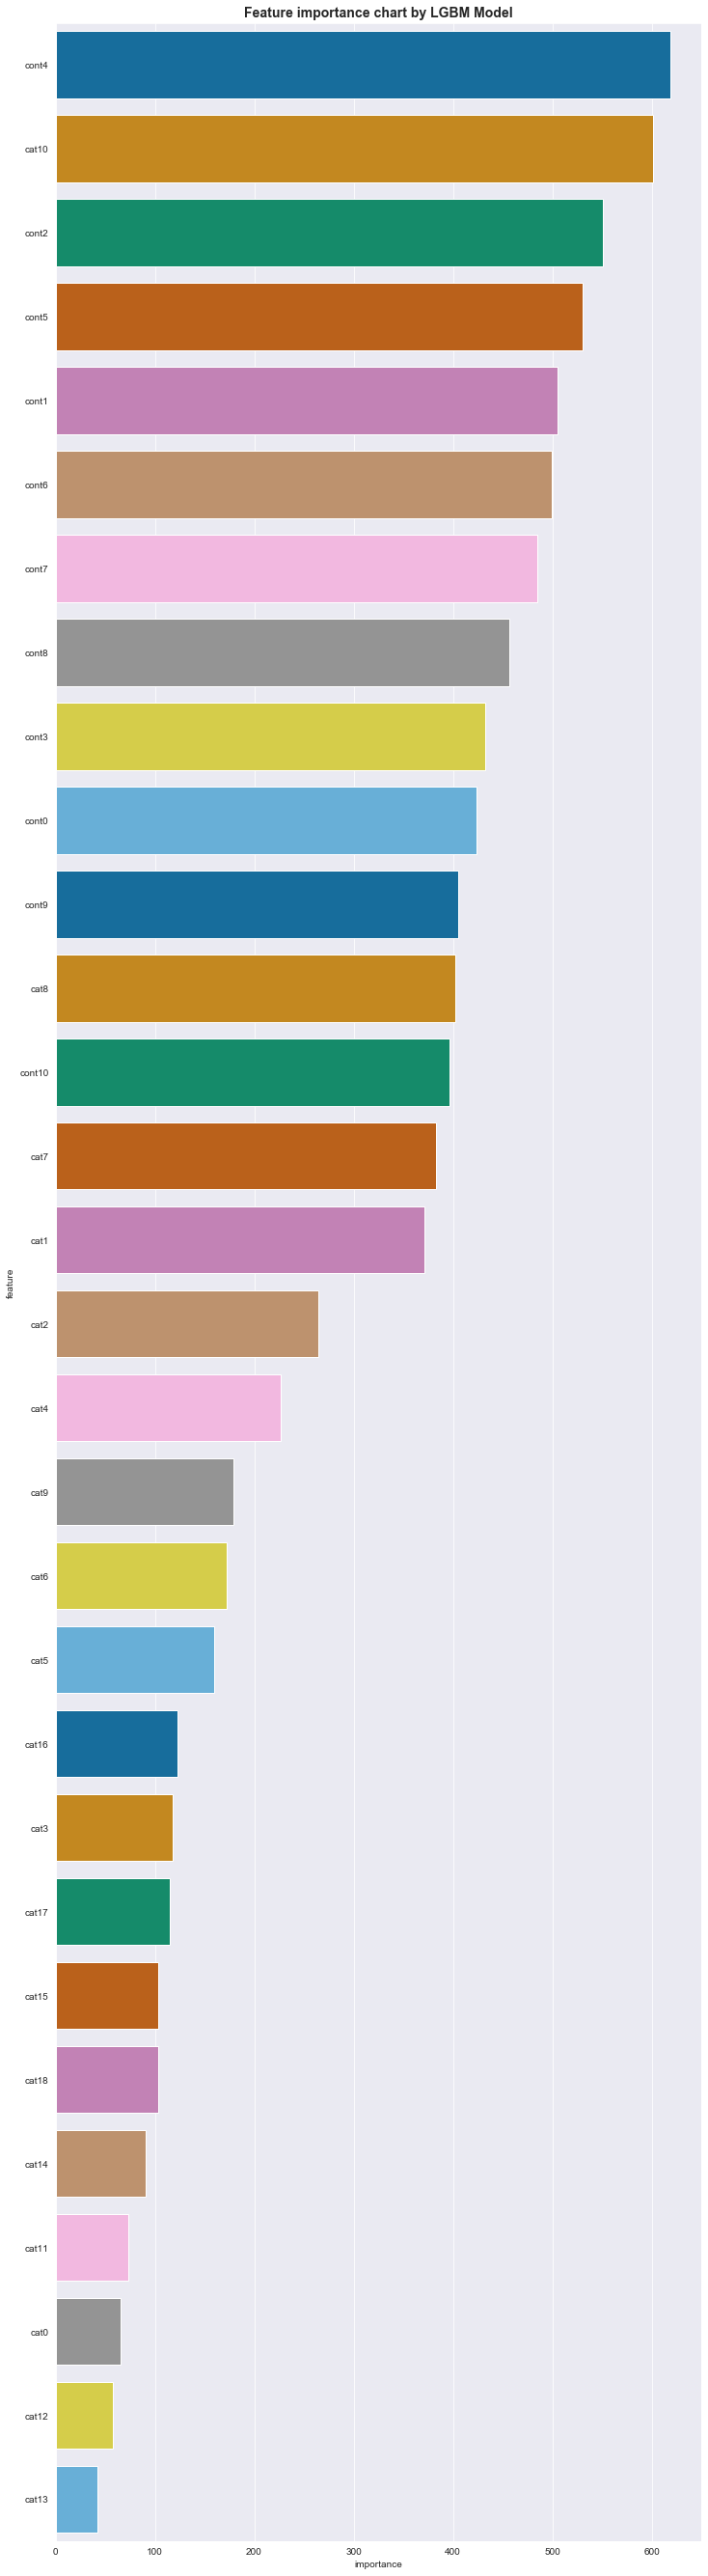

In [81]:
plt.figure(figsize=(12,48))
plt.title("Feature importance chart by LGBM Model",fontsize=14,fontweight='bold')
sns.barplot( y = 'feature', x = 'importance', data = feature_rank,palette='colorblind');

We will select top 20 features and then train the model on these features

In [82]:
top20_cols = feature_rank['feature'].values[:20].tolist()
print(top20_cols)

['cont4', 'cat10', 'cont2', 'cont5', 'cont1', 'cont6', 'cont7', 'cont8', 'cont3', 'cont0', 'cont9', 'cat8', 'cont10', 'cat7', 'cat1', 'cat2', 'cat4', 'cat9', 'cat6', 'cat5']


In [83]:
x_train20 = x_train[top20_cols]
x_val20 = x_val[top20_cols]

##### Model - LightGBM (top 20 features +Hypertuned)

In [84]:
%%time

clf = LGBMClassifier(random_state=100,n_estimators=100)

param_grid = {'n_estimators':[100,200,300],
            'learning_rate':[0.01, 0.1, 0.2],
             'max_depth':[3,6,9,10],
              'reg_alpha' : [0.0001, 0.001, 0.01],
             'reg_lambda' : [0, 0.0001, 0.001, 0.01],
            'min_child_samples' : [5, 10, 15,20],
              'feature_fraction':[0.4,0.6,0.8]
            }

lgbm_grid =RandomizedSearchCV(estimator=clf,
                              param_distributions=param_grid,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              random_state=100)

lgbm_grid.fit(x_train20,y_train)

lgbm_best20 = lgbm_grid.best_estimator_

#Model_perf,model_lgbm1 = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'LightGBM-Hypertuned',Model_perf)

Model_perf = model_scoring(lgbm_best20,'LGBM-20features+Hypertuned',x_train20,y_train,x_val20,y_val,Model_perf)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

In [85]:
lgbm_best20.predict_proba(xtest[top20_cols])

array([[0.86473187, 0.13526813],
       [0.59999535, 0.40000465],
       [0.93509409, 0.06490591],
       ...,
       [0.43374158, 0.56625842],
       [0.83986698, 0.16013302],
       [0.54617103, 0.45382897]])

In [86]:
%%time

make_prediction(lgbm_best20,xtest[top20_cols],xtest_id,'LGBM20-HP')

Model_perf

Wall time: 1.98 s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417


In [87]:
top25_cols = feature_rank['feature'].values[:25].tolist()
print(top25_cols)

['cont4', 'cat10', 'cont2', 'cont5', 'cont1', 'cont6', 'cont7', 'cont8', 'cont3', 'cont0', 'cont9', 'cat8', 'cont10', 'cat7', 'cat1', 'cat2', 'cat4', 'cat9', 'cat6', 'cat5', 'cat16', 'cat3', 'cat17', 'cat15', 'cat18']


In [88]:
x_train25 = x_train[top25_cols]
x_val25 = x_val[top25_cols]

##### Model - LightGBM (top 25 features +Hypertuned)

In [89]:
%%time

clf = LGBMClassifier(random_state=100,n_estimators=100)

param_grid = {'n_estimators':[100,200,300],
            'learning_rate':[0.01, 0.1, 0.2],
             'max_depth':[3,6,9,10],
              'reg_alpha' : [0.0001, 0.001, 0.01],
             'reg_lambda' : [0, 0.0001, 0.001, 0.01],
            'min_child_samples' : [5, 10, 15,20],
              'feature_fraction':[0.4,0.6,0.8]
            }

lgbm_grid =RandomizedSearchCV(estimator=clf,
                              param_distributions=param_grid,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              random_state=100)

lgbm_grid.fit(x_train25,y_train)

lgbm_best25 = lgbm_grid.best_estimator_

#Model_perf,model_lgbm1 = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'LightGBM-Hypertuned',Model_perf)

Model_perf = model_scoring(lgbm_best25,'LGBM-25features+Hypertuned',x_train25,y_train,x_val25,y_val,Model_perf)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

In [90]:
lgbm_best25.predict_proba(xtest[top25_cols])

array([[0.86299813, 0.13700187],
       [0.48235476, 0.51764524],
       [0.95836201, 0.04163799],
       ...,
       [0.38547657, 0.61452343],
       [0.89379136, 0.10620864],
       [0.3459053 , 0.6540947 ]])

In [91]:
%%time

make_prediction(lgbm_best25,xtest[top25_cols],xtest_id,'LGBM25-HP')

Model_perf

Wall time: 2.01 s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417


##### LGBM ( Remove Correlated Feature + Hypertuned model ) 

In [92]:
x_train[num_cols].corr()

,cont0,cont1,cont10,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9
cont0,1.000000,0.474256,0.808589,0.494495,0.550333,0.155408,-0.169710,-0.437503,0.740851,0.368625,0.414726
cont1,0.474256,1.000000,0.471419,0.861666,0.258428,0.134127,0.185016,0.115573,0.581570,0.672038,0.393746
cont10,0.808589,0.471419,1.000000,0.506756,0.611535,0.207590,-0.161745,-0.444568,0.775463,0.383296,0.452117
cont2,0.494495,0.861666,0.506756,1.000000,0.287744,0.158117,0.157074,0.066450,0.606331,0.662822,0.399105
cont3,0.550333,0.258428,0.611535,0.287744,1.000000,0.222987,-0.070005,-0.430154,0.642822,0.190211,0.382912
cont4,0.155408,0.134127,0.207590,0.158117,0.222987,1.000000,0.038236,-0.080392,0.231522,0.063976,0.160660
cont5,-0.169710,0.185016,-0.161745,0.157074,-0.070005,0.038236,1.000000,0.440130,-0.094942,0.141536,0.120245
cont6,-0.437503,0.115573,-0.444568,0.066450,-0.430154,-0.080392,0.440130,1.000000,-0.362159,0.121244,-0.124187
cont7,0.740851,0.581570,0.775463,0.606331,0.642822,0.231522,-0.094942,-0.362159,1.000000,0.479887,0.443246
cont8,0.368625,0.672038,0.383296,0.662822,0.190211,0.063976,0.141536,0.121244,0.479887,1.000000,0.296038


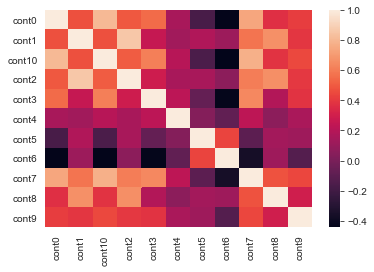

In [93]:
sns.heatmap(x_train[num_cols].corr());

cont1 and cont2 are highly correlated. so we will drop one of these and then build the model

In [94]:
x_train1 = x_train.drop(['cont2'],axis=1)
x_val1 = x_val.drop(['cont2'],axis=1)

In [95]:
%%time

clf = LGBMClassifier(random_state=100,n_estimators=100)

param_grid = {'n_estimators':[100,200,300],
            'learning_rate':[0.01, 0.1, 0.2],
             'max_depth':[3,6,9,10],
              'reg_alpha' : [0.0001, 0.001, 0.01],
             'reg_lambda' : [0, 0.0001, 0.001, 0.01],
            'min_child_samples' : [5, 10, 15,20],
              'feature_fraction':[0.4,0.6,0.8]
            }

lgbm_grid =RandomizedSearchCV(estimator=clf,
                              param_distributions=param_grid,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              random_state=100)

lgbm_grid.fit(x_train1,y_train)

lgbm_best1 = lgbm_grid.best_estimator_

#Model_perf,model_lgbm1 = model_building(clf,param_grid,x_train,y_train,x_val,y_val,'LightGBM-Hypertuned',Model_perf)

Model_perf = model_scoring(lgbm_best1,'LGBM-FeatureSelection+Hypertuned',x_train1,y_train,x_val1,y_val,Model_perf)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

In [96]:
lgbm_best1.predict_proba(xtest.drop(['cont2'],axis=1))

array([[0.87212899, 0.12787101],
       [0.54146316, 0.45853684],
       [0.97152497, 0.02847503],
       ...,
       [0.39066943, 0.60933057],
       [0.87844879, 0.12155121],
       [0.62674933, 0.37325067]])

In [97]:
%%time

make_prediction(lgbm_best1,xtest.drop(['cont2'],axis=1),xtest_id,'LGBM1-HP')

Model_perf

Wall time: 1.4 s


,Model,Train score,Validation score,roc_auc_Score
0,Baseline model -logistic,0.837249,0.837600,0.868596
0,Baseline model -Decision Tree,0.770124,0.765480,0.709744
0,Decision Tree-Hypertuned,0.804164,0.804227,0.764445
0,Bagging,0.837307,0.837693,0.868592
0,AdaBoost,0.827733,0.828427,0.852773
0,Random Forest,0.846018,0.844227,0.882456
0,Gradient Boosting,0.842556,0.843080,0.879835
0,XGBoost,0.842120,0.842853,0.879721
0,XGBoost RF,0.824467,0.824240,0.851470
0,LightGBM,0.847378,0.845520,0.887417
